In [4]:

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("numeric_df.csv")
print(df.shape)
print(df.isnull().sum())
df.head()

(697749, 80)
Src Port            0
Dst Port            0
Protocol            0
Flow Duration       0
Total Fwd Packet    0
                   ..
Idle Mean           0
Idle Std            0
Idle Max            0
Idle Min            0
Label               0
Length: 80, dtype: int64


,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,16725,6668,6,90892975,2,0,2920.0,0.0,1460.0,1460.0,...,20,0.0,0.0,0.0,0.0,90892980.0,0.0,90892980.0,90892980.0,ddos_ack_frag
1,80,46018,6,32886,1,1,0.0,1460.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos_ack_frag
2,63790,8008,6,51449412,2,0,2920.0,0.0,1460.0,1460.0,...,20,0.0,0.0,0.0,0.0,51449412.0,0.0,51449412.0,51449412.0,ddos_ack_frag
3,80,5806,6,46874,1,1,0.0,1460.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos_ack_frag
4,443,51810,6,72898,6,0,253.0,0.0,222.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,benign


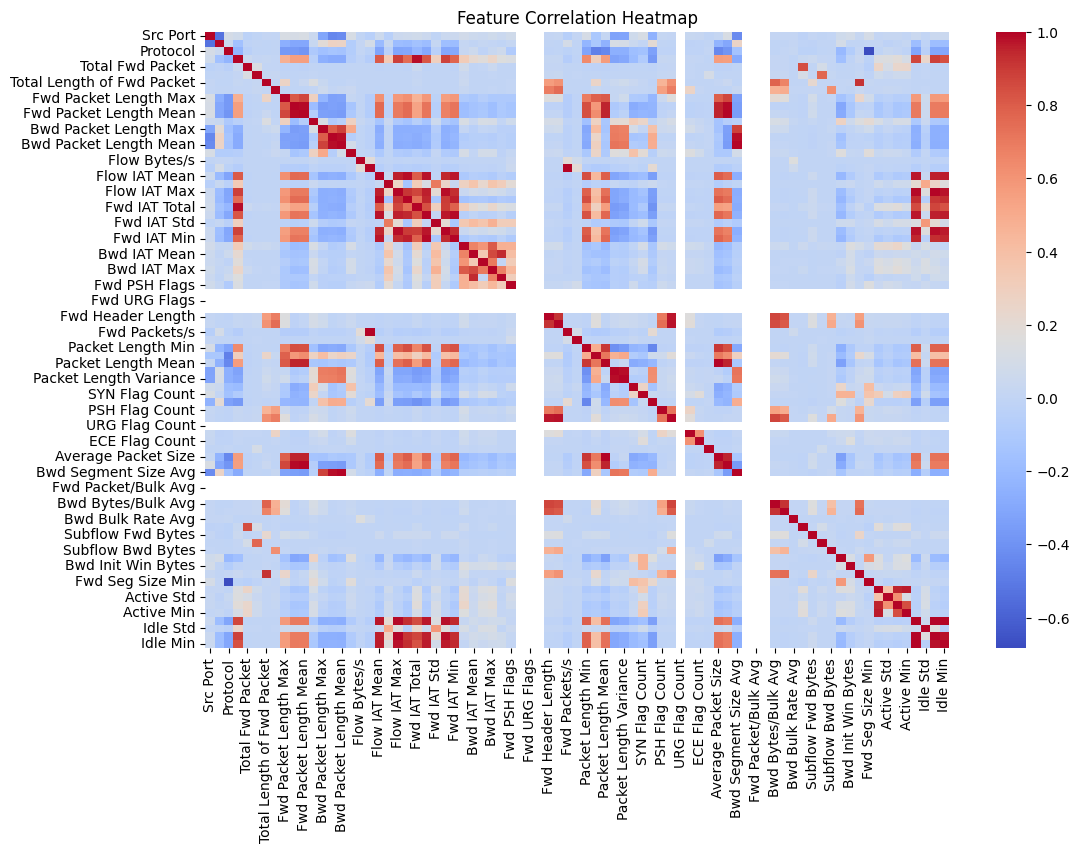

In [6]:
corr_matrix =df.drop(['Label'],axis=1).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Label', axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.decomposition import PCA

pca = PCA(n_components=50)  # Reduce to 50 features
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


from sklearn.svm import LinearSVC

model = LinearSVC(dual=False, max_iter=5000)
model.fit(X_train_pca, y_train)


y_pred = model.predict(X_test_pca)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 


c:\Users\Toril\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy scores for all models
print(f"Accuracy Scores of PCA: {accuracy:.4f}")

Accuracy Scores of Random forest Model: 0.7274


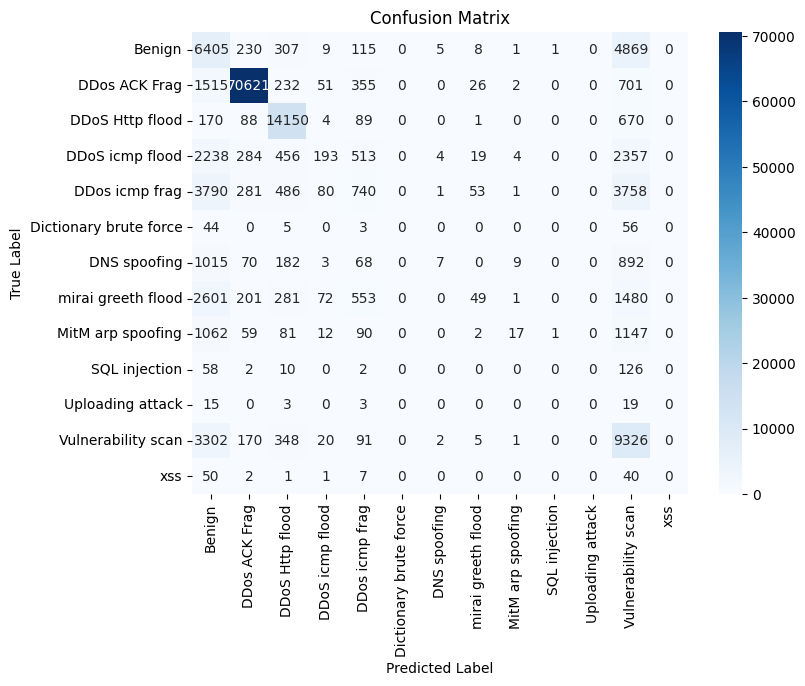

c:\Users\Toril\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Toril\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
                     precision    recall  f1-score   support

            benign       0.29      0.54      0.37     11950
     ddos_ack_frag       0.98      0.96      0.97     73503
   ddos_http_flood       0.86      0.93      0.89     15172
   ddos_icmp_flood       0.43      0.03      0.06      6068
    ddos_icmp_frag       0.28      0.08      0.13      9190
  dict_brute_force       0.00      0.00      0.00       108
      dns_spoofing       0.37      0.00      0.01      2246
mirai_greeth_flood       0.30      0.01      0.02      5238
    mitm_arp_spoof       0.47      0.01      0.01      2471
     sql_injection       0.00      0.00      0.00       198
  uploading_attack       0.00      0.00      0.00        40
vulnerability_scan       0.37      0.70      0.48     13265
               xss       0.00      0.00      0.00       101

          accuracy                           0.73    139550
         macro avg       0.33      0.25      0.23    139550
      weighted

c:\Users\Toril\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign","DDos ACK Frag","DDoS Http flood","DDoS icmp flood","DDos icmp frag","Dictionary brute force","DNS spoofing","mirai greeth flood", "MitM arp spoofing","SQL injection","Uploading attack", "Vulnerability scan", "xss"], yticklabels=["Benign","DDos ACK Frag","DDoS Http flood","DDoS icmp flood","DDos icmp frag","Dictionary brute force","DNS spoofing","mirai greeth flood", "MitM arp spoofing","SQL injection","Uploading attack", "Vulnerability scan", "xss"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

report = classification_report(y_test, y_pred)

# Print the report
print("Classification Report:\n", report)